<p style="background-color:#A435F0;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Projesi - Udemy Kursları</b></p>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Udemy_logo.svg/1200px-Udemy_logo.svg.png" width="300" height="500"/>
</div>

<b>İçindekiler:</b>
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunların Düzenlenmesi</a></li>
<li><a href="#outliers">Aykırı Değerleri Tespit Etme</a></li>
<li><a href="#future-engineering">Future Engineering</a></li>
<li><a href="#data-visualization">Veri Görselleştirme</a></li>
<li><a href="#conclusion">Sonuç</a></li>
</ul>

<a id='import-library'></a>
# <font color='#A435F0'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='#A435F0'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [35]:
df0 = pd.read_csv("udemy_courses_dataset.csv")
df = df0.copy()

In [36]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [37]:
df.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2959,599532,How to Set Up a Self-Hosted Wordpress Website ...,https://www.udemy.com/how-to-set-up-a-wordpres...,False,0,8770,261,13,Beginner Level,0.533333,2015-09-20T23:05:59Z,Web Development
1082,304420,Breakeven Analysis and Pricing,https://www.udemy.com/breakeven-analysis-and-p...,True,20,27,2,10,All Levels,1.000000,2014-09-22T04:32:37Z,Business Finance
1802,1257976,Your First 10 Guitar Lessons - Learn how to pl...,https://www.udemy.com/your-first-10-guitar-les...,False,0,924,4,18,Beginner Level,1.000000,2017-06-29T00:29:36Z,Musical Instruments
3298,661878,Learn to Build Web Apps using Laravel Framework,https://www.udemy.com/learn-to-build-web-apps-...,True,30,746,93,39,All Levels,6.500000,2015-11-10T22:15:21Z,Web Development
3447,520308,Learn to make a colorful one page website,https://www.udemy.com/learn-to-make-a-colorful...,True,200,1220,16,16,All Levels,0.566667,2015-06-05T18:09:58Z,Web Development


<a id='understanding-dataset'></a>
# <font color='#A435F0'> <b>Veri Setini Anlama</b><font color='black'> 

In [39]:
df.shape

(3678, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


In [42]:
df.describe(include="object").T

,count,unique,top,freq
course_title,3678,3663,Acoustic Blues Guitar Lessons,3
url,3678,3672,https://www.udemy.com/cfa-level-2-quantitative...,2
level,3678,4,All Levels,1929
published_timestamp,3678,3672,2017-07-02T14:29:35Z,2
subject,3678,4,Web Development,1200


In [43]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3678   │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ course_id          │   0 │     0 │  676000 │  343300 │  8324 │ 407700 │ 687900 │ 961400 │ 1282000 │ ▅▆▇▇▇▆ │  │
│ │ price              │   0 │     0 │   66.05 │   61.01 │     0 │     20 │     45 │     95 │     200 │ ▇▆▂▁▁▃ │  │
│ │ num_subscribers    │   0 │     0 │    3197 │    9504 │     0 │    111 │  911.5 │   2546 │  268900 │   ▇    │  │
│ │ num_reviews        │   0 │     0 │   156.3 │   935.5 │     0 │      4 │     18 │     67 │   27440 │   ▇    │  │
│ │ num_lectures       │   0 │     0 │   40.11 │   50.38 │     0 │     15 │     25 │  45.75 │     779 │   ▇    │  │
│ │ content_duration   │   0 │     0 │   4.095 │   6.054 │     0 │      1 │      2 │    4.5 │    78.5 │   ▇    │  │
│ └────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ is_paid                            │            3368 │                          0.92 │       ▁    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ course_title                         │     0 │         0 │                      7.2 │                26418 │  │
│ │ url                                  │     0 │         0 │                        1 │                 3678 │  │
│ │ level                                │     0 │         0 │                        2 │                 7356 │  │
│ │ published_timestamp                  │     0 │      

In [44]:
df.duplicated().sum()

6

In [45]:
df = df.drop_duplicates()

In [46]:
df.duplicated().sum()

0

In [47]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

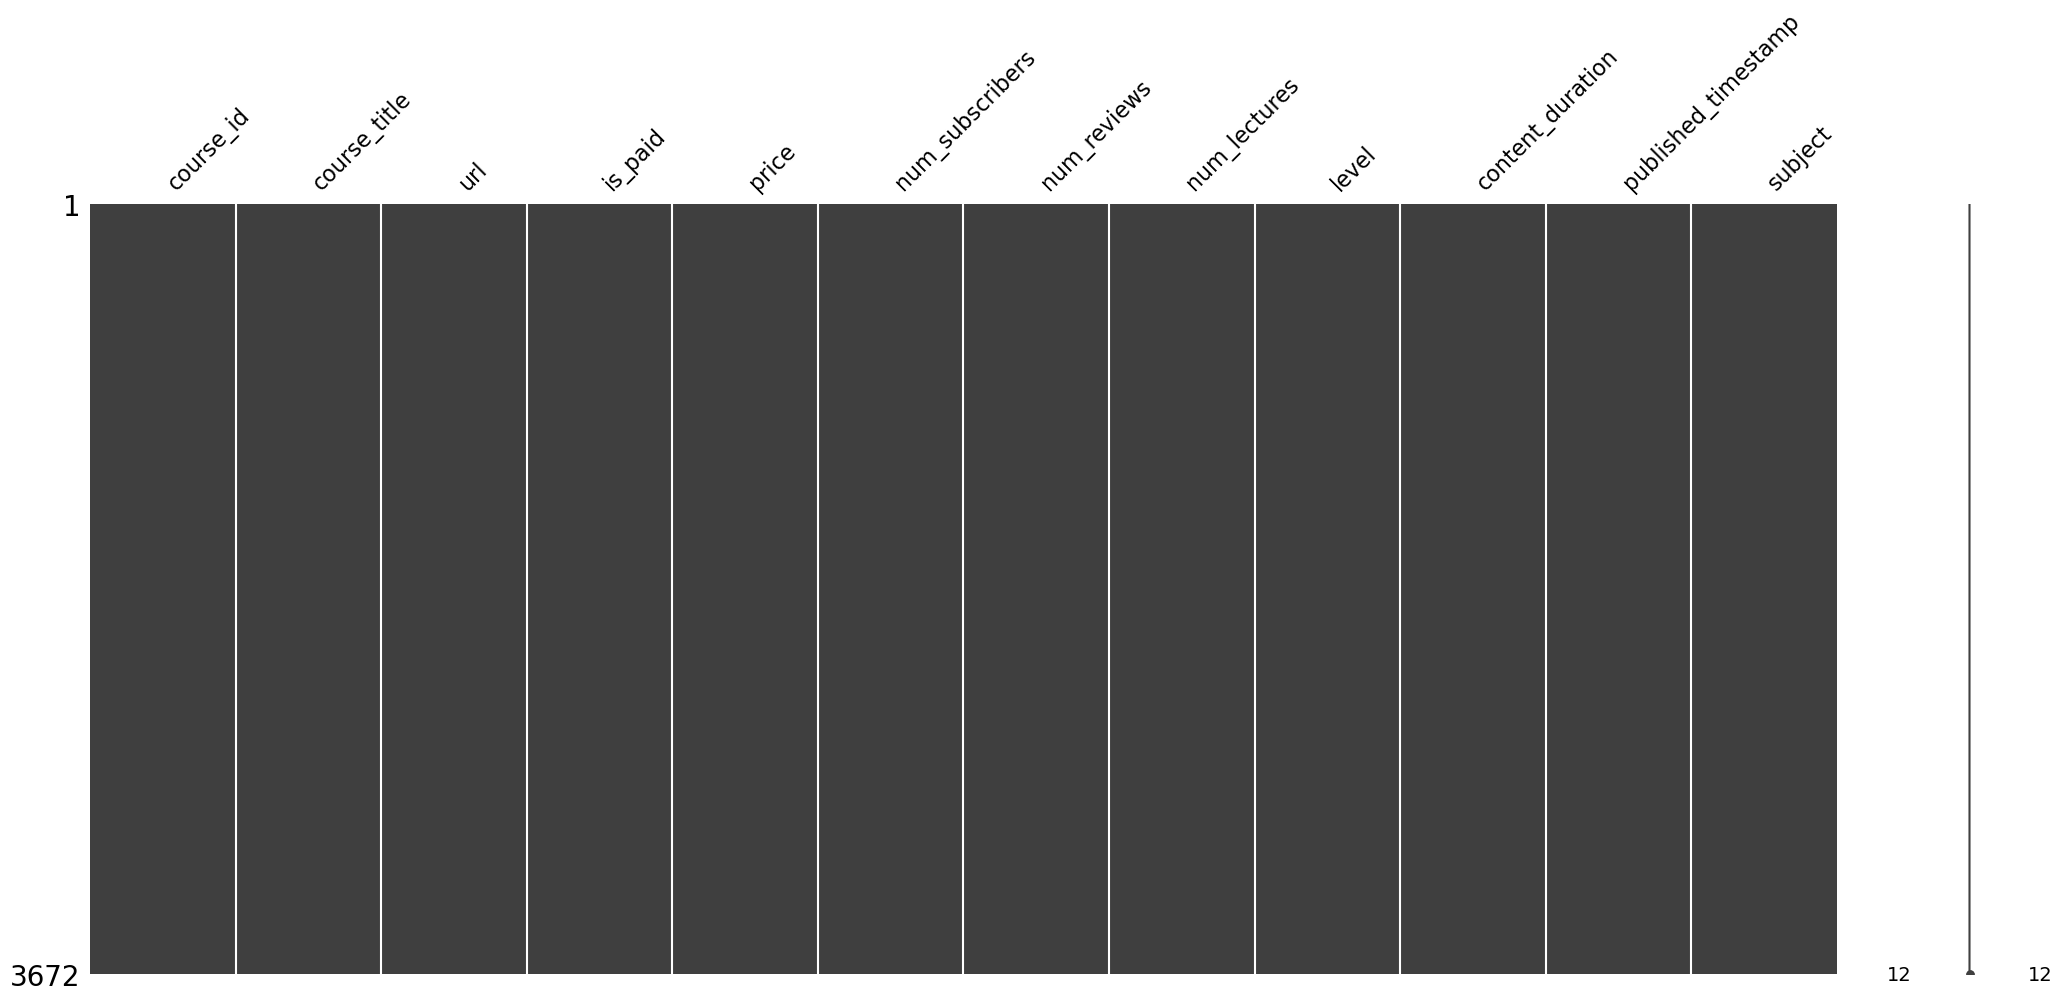

In [48]:
msno.matrix(df);

<a id='organizing-columns'></a>
# <font color='#A435F0'> <b>Sütunların Düzenlenmesi</b><font color='black'> 

In [50]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

## <font color='#C17CFA'> <b>"course_title" Column</b><font color='black'> 

In [52]:
df["course_title"] = df["course_title"].str.strip()

## <font color='#C17CFA'> <b>"url" Column</b><font color='black'> 

"url" sütunu bu projede kullanılmayacak, dolayısıyla bu sütunu veri kümesinden çıkarabiliriz.

In [55]:
df = df.drop('url', axis=1)

In [56]:
df.columns = ['id', 'title', 'paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'duration',
       'published_time', 'subject']

In [57]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject'],
      dtype='object')

## <font color='#C17CFA'> <b>"paid" Sütunu</b><font color='black'> 

In [59]:
df.paid.unique()

array([ True, False])

In [60]:
df.paid.dtype

dtype('bool')

## <font color='#C17CFA'> <b>"price" Sütunu</b><font color='black'> 

In [62]:
df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

## <font color='#C17CFA'> <b>"num_reviews" Sütunu</b><font color='black'> 

In [64]:
df.num_reviews.dtype

dtype('int64')

## <font color='#C17CFA'> <b>"num_lectures" Sütunu</b><font color='black'> 

In [66]:
df.num_lectures.dtype

dtype('int64')

## <font color='#C17CFA'> <b>"level" Sütunu</b><font color='black'> 

In [68]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

## <font color='#C17CFA'> <b>"duration" Sütunu</b><font color='black'> 

In [70]:
df.duration = df.duration.round(2)

## <font color='#C17CFA'> <b>"published_time" Sütunu</b><font color='black'> 

In [72]:
df['published_time'] = df['published_time'].str.replace('T', ' ').str.replace('Z', '')

In [73]:
df['published_time'] = pd.to_datetime(df['published_time'])

In [74]:
# zaman olmadan sadece tarih şeklinde düzenlemek için
# df['published_timestamp'] = pd.to_datetime(df['published_timestamp']).dt.date
# df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [75]:
df.published_time.dtype

dtype('<M8[ns]')

## <font color='#C17CFA'> <b>"subject" Sütunu</b><font color='black'> 

In [77]:
df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

<a id='outliers'></a>
# <font color='#A435F0'> <b>Aykırı Değerleri Tespit Etme</b><font color='black'> 

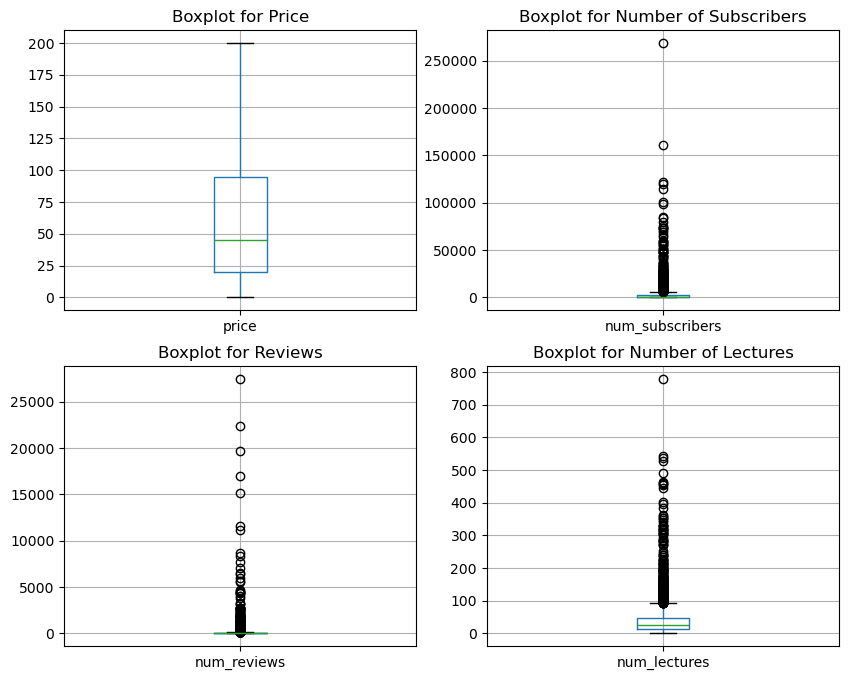

In [79]:
# Kutu grafikleri için 2x2'lik bir ızgara oluşturma
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 'price' Sütunu için Boxplot
df.boxplot(column='price', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot for Price')

# 'subscribers' Sütunu için Boxplot
df.boxplot(column='num_subscribers', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot for Number of Subscribers')

# 'reviews' Sütunu için Boxplot
df.boxplot(column='num_reviews', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for Reviews')

# 'lectures' Sütunu için Boxplot
df.boxplot(column='num_lectures', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot for Number of Lectures')

plt.show()

<a id='future-engineering'></a>
# <font color='#A435F0'> <b>Future Engineering</b><font color='black'> 

**Bu bölümde mevcut sütunları kullanarak yeni sütunlar oluşturacağız.**

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>"revenue" Sütunu Oluşturma</b><font color='black'> 

In [83]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject'],
      dtype='object')

In [84]:
df["revenue"] = df["price"] * df["num_subscribers"]

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>"year" Sütunu Oluşturma</b><font color='black'> 

In [86]:
df["year"] = df["published_time"].dt.year

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>"price_category" Sütunu Oluşturma</b><font color='black'> 

In [88]:
# Low (Düşük): 0 - 50
# Medium (Orta): 51 - 150
# High (Yüksek): 151 and above
labels = ['Low', 'Medium', 'High']
bins = [0, 50, 150, float('inf')] 
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

In [89]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject',
       'revenue', 'year', 'price_category'],
      dtype='object')

In [90]:
df = df.reindex(columns=['id', 'title', 'paid', 'price', 'price_category', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'year', 'subject',
       'revenue'])

In [91]:
df.sample(5)

,id,title,paid,price,price_category,num_subscribers,num_reviews,num_lectures,level,duration,published_time,year,subject,revenue
2671,856490,Interaction Design Specialist For Web Developers,True,95,Medium,8594,37,18,All Levels,2.00,2016-07-04 22:11:35,2016,Web Development,816430
1048,960786,バイナリーオプション取引,True,85,Medium,29,3,24,All Levels,0.65,2016-11-28 17:50:49,2016,Business Finance,2465
3206,405282,PHP for Beginners -Become a PHP Master - Proje...,True,200,High,28880,4316,286,All Levels,30.50,2015-02-14 00:54:08,2015,Web Development,5776000
779,1249146,Planning and Executing a Financial Statement A...,True,50,Medium,0,0,9,Intermediate Level,2.00,2017-06-29 23:18:51,2017,Business Finance,0
401,1046724,Quantitative Trading Analysis with R,True,50,Medium,567,40,53,All Levels,7.50,2016-12-22 18:24:55,2016,Business Finance,28350


<a id='data-visualization'></a>
# <font color='#A435F0'> <b>Veri Görselleştirme</b><font color='black'> 

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Kurs Ücretlerinin Dağılımı</b><font color='black'> 

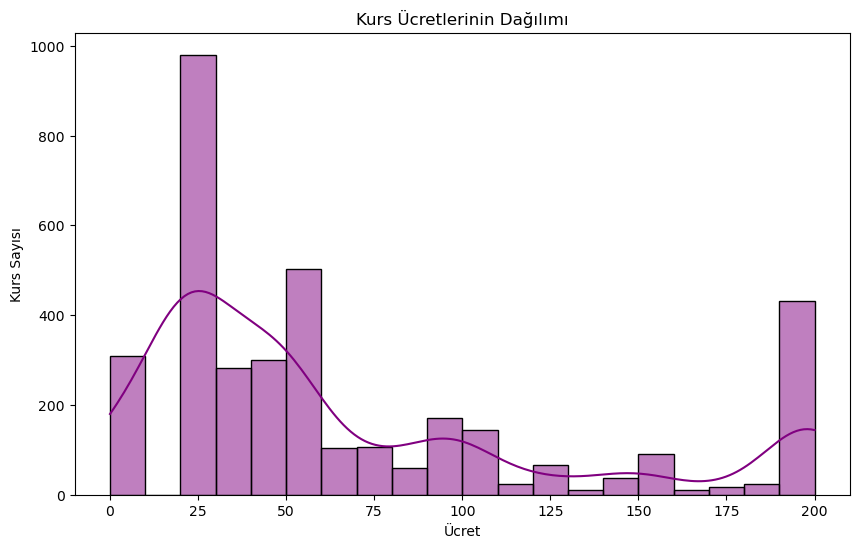

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='purple')

plt.title('Kurs Ücretlerinin Dağılımı')
plt.xlabel('Ücret')
plt.ylabel('Kurs Sayısı')
plt.show()

In [137]:
price_dist = df.price_category.value_counts()
price_dist

price_category
Low       1871
Medium    1228
High       573
Name: count, dtype: int64

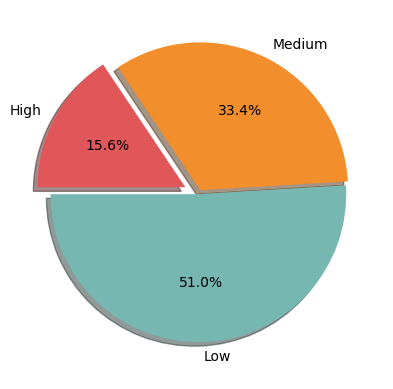

In [139]:
plt.pie(x= price_dist.values,
        labels= price_dist.index,
        autopct="%1.1f%%",
        explode= [0, 0.03, 0.1],
        colors= ["#76b7b2", "#f28e2b", "#e15759"],
        shadow= True,
        startangle= 180
       )

plt.show()

Bu iki grafikte kurs fiyatlarının dağılımı gösterilmektedir. Çoğu kursun fiyatı 25 dolara kadar olup, özellikle ücretsiz ve düşük fiyatlı kursların yaygın olduğunu görülüyor. Fiyat arttıkça kurs sayısının azaldığı da gözlemlenmektedir. Özellikle 200 dolar bandında birkaç kursun bulunması, yüksek fiyatlı kursların da talep gördüğünü işaret etmektedir.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Fiyat ile Abone Sayısı Arasındaki İlişki</b><font color='black'> 

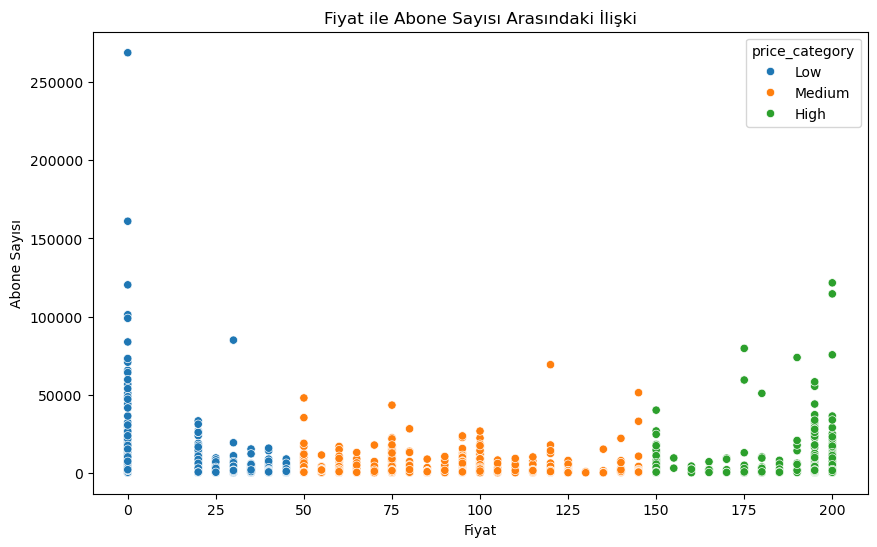

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='num_subscribers', data=df, color='purple', hue= 'price_category')

plt.title('Fiyat ile Abone Sayısı Arasındaki İlişki')
plt.xlabel('Fiyat')
plt.ylabel('Abone Sayısı')

plt.show()

Bu grafiğe bakıldığında Udemy kurslarının fiyatlarına göre abone dağılımı görülmektedir. Grafikteki ana noktalar şu şekildedir:

**Genel Trend:**
Düşük fiyatlı kurslar (özellikle ücretsiz olanlar), büyük ölçüde daha fazla abone çekmektedir. Bu da eğitim için erişilebilir fiyatların öğrenciler üzerinde büyük bir etkisi olduğunu göstermektedir.
Yüksek fiyatlı kurslar (150-200 dolar civarında) çok az sayıda kursun bu seviyede fiyatlandırıldığını göstermektedir ve bu kursların abone sayıları genellikle daha düşüktür, ancak bazı istisnalar da bulunmaktadır.

**Özet:**
 - Düşük fiyatlı kurslar, özellikle ücretsiz olanlar, en fazla abone sayısına ulaşma eğilimindedir.
 - Fiyat arttıkça, kurslara olan talep (abone sayısı) azalır. Ancak, fiyat kategorileri arasında bazı yüksek fiyatlı kurslar da nispeten çok abone çekebilir.

**Bu görsel, fiyatların abone sayısına etkisini açık bir şekilde göstermekte ve kurs geliştiricilerinin stratejilerini nasıl şekillendirebileceği konusunda önemli ipuçları sunmaktadır.**

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Kurs Seviyelerinin Dağılımı</b><font color='black'> 

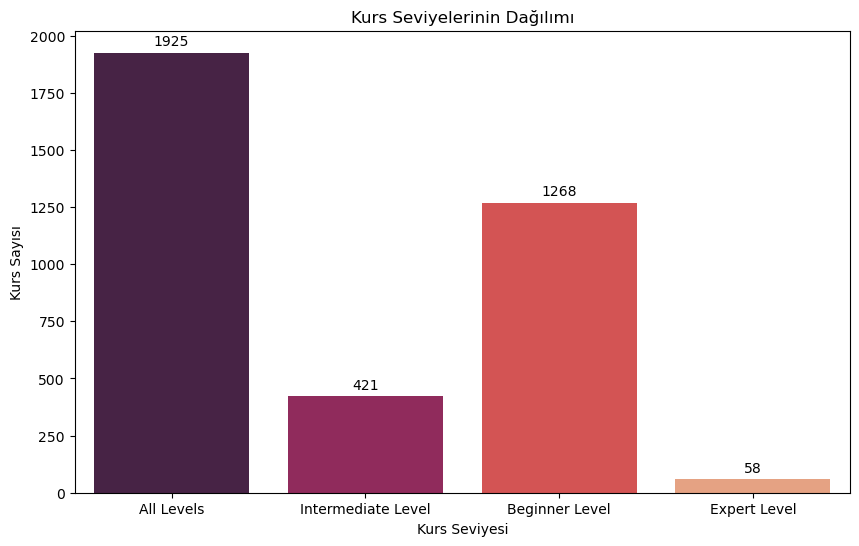

In [146]:
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(x='level', data=df, palette='rocket')

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Kurs Seviyelerinin Dağılımı')
plt.xlabel('Kurs Seviyesi')
plt.ylabel('Kurs Sayısı')

plt.show()

Grafikte kursların seviye bazında dağılımı gösterilmektedir. En fazla kursun **"Tüm Seviyeler"** kategorisinde yer aldığı görülmektedir (1925 kurs). Başlangıç seviyesi kursları ise 1248 ile ikinci sırada yer almaktadır. Uzman seviyesi kurs sayısı oldukça azdır (sadece 36 kurs). Bu durum, kursların genellikle daha geniş kitlelere hitap edecek şekilde tasarlandığını göstermektedir.

## <font color='#C17CFA'> <b>Konu Bazında Analiz</b><font color='black'> 

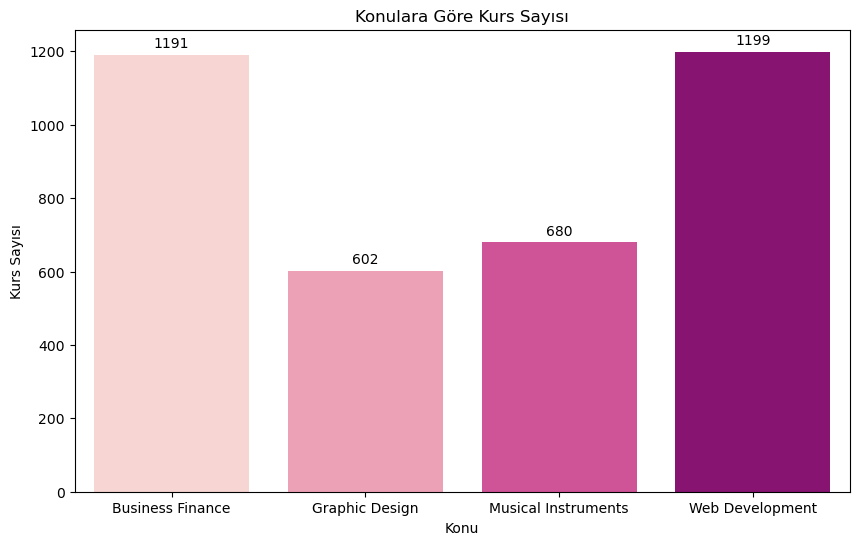

In [151]:
plt.figure(figsize=(10, 6))
ax2 = sns.countplot(x='subject', data=df, palette='RdPu')

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Konulara Göre Kurs Sayısı')
plt.xlabel('Konu')
plt.ylabel('Kurs Sayısı')

plt.show()

Bu grafikte kursların konulara göre dağılımı gösterilmektedir. **"İşletme Finansı"** ve **"Web Geliştirme"** en fazla kursa sahip olan iki kategori olarak öne çıkmaktadır. Özellikle web geliştirme alanında kurs sayısının (1199) diğer kategorilere göre oldukça yüksek olduğu görülmektedir. Bu durum, teknoloji ve finans alanındaki talebin fazla olduğunu göstermektedir.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Yıllara Göre Gelir Analizi</b><font color='black'> 

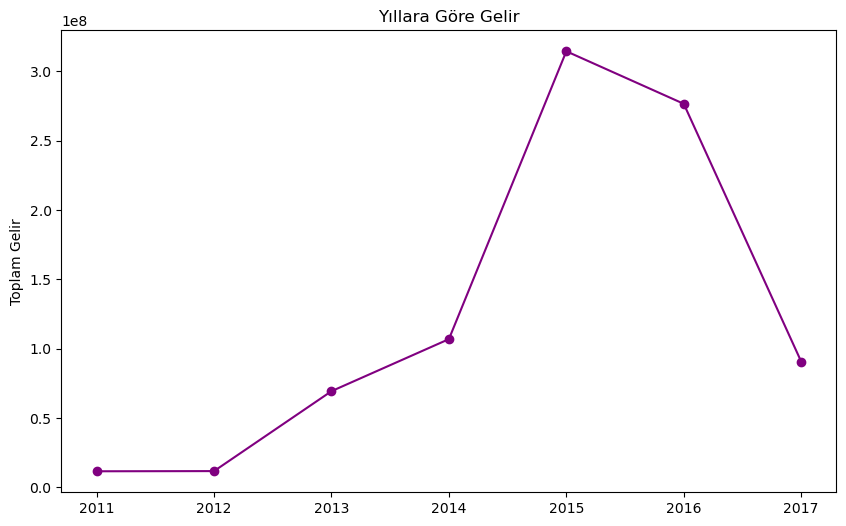

In [157]:
revenue_by_year = df.groupby('year')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(revenue_by_year['year'], revenue_by_year['revenue'], marker='o', color='purple')

plt.title('Yıllara Göre Gelir')
plt.ylabel('Toplam Gelir')

plt.show()

Grafikte, 2011 yılından 2015 yılına kadar toplam gelirde düzenli bir artış görülmekte ve 2015 yılında en yüksek seviyeye ulaşmaktadır. Ancak, 2015'ten sonra gelirde belirgin bir düşüş yaşanmakta ve 2017'deki hasılat, 2014 seviyesinin altına düşmektedir. Bu, platformun hızlı bir büyüme dönemi geçirdikten sonra gelirde azalma yaşadığını işaret etmektedir.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>İçerik Süresi Analizi</b><font color='black'> 

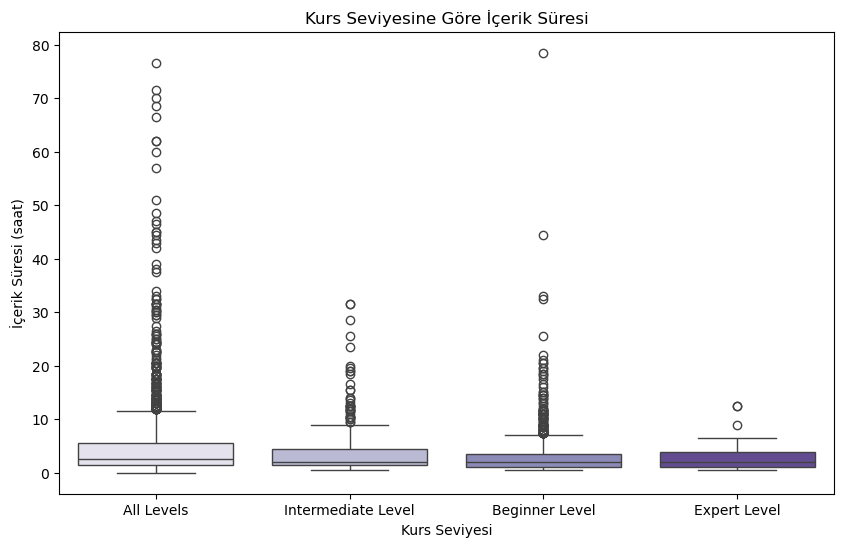

In [161]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='level', y='duration', data=df, palette='Purples')

plt.title('Kurs Seviyesine Göre İçerik Süresi')
plt.xlabel('Kurs Seviyesi')
plt.ylabel('İçerik Süresi (saat)')

plt.show()

Bu kutu grafiğinde;
 - Tüm Seviyeler, Orta Seviye ve Başlangıç kurslarının medyan süresi yaklaşık 10 saat, bazı kurslar 70-80 saate kadar çıktığı gözlemlenmektedir.
 - Uzman Seviyesi kursların ise ortalama olarak daha kısa olduğu, medyan süresinin yaklaşık 5-7 saat ve daha az sayıdaki kursların 30 saate kadar uzadığı gözlemlenmektedir.

**Kısacası, çoğu kurs yaklaşık 10 saat sürmektedir ancak uzman seviyesi kursların süresi genellikle daha kısa olarak gözlemlenmiştir.**

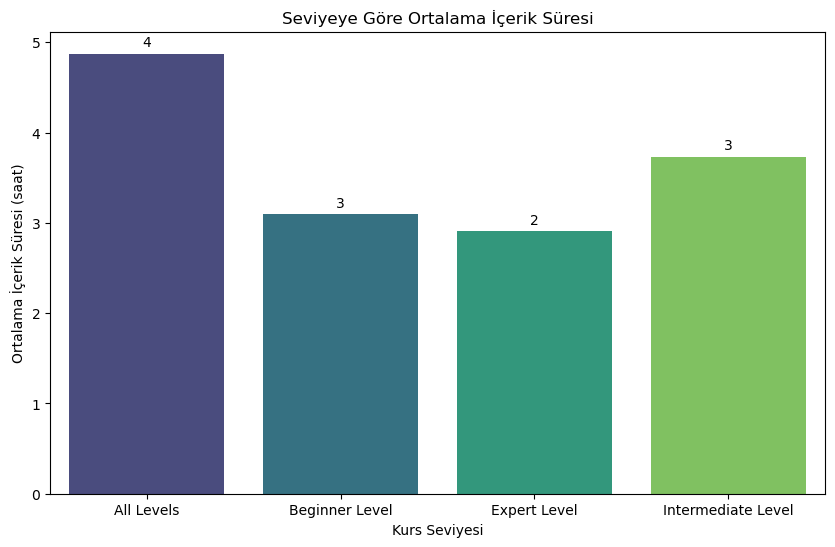

In [164]:
avg_duration_by_level = df.groupby('level')['duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='level', y='duration', data=avg_duration_by_level, palette='viridis')

for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Seviyeye Göre Ortalama İçerik Süresi')
plt.xlabel('Kurs Seviyesi')
plt.ylabel('Ortalama İçerik Süresi (saat)')

plt.show()

Bu çubuk grafiği farklı kurs seviyelerinde ortalama içerik süresini (saat cinsinden) göstermektedir.
 - Tüm Seviyeler kursları en uzun ortalama içerik süresine sahip olup, geniş bir kitleye hitap eden kapsamlı içerikler sunduğunu göstermektedir.
 - Başlangıç ve Uzman Seviyeleri daha kısa sürelerde ortalama içeriklere sahiptir. Bu da temel veya ileri düzey konulara odaklanıldığını göstermektedir.
 - Orta Seviye kursları, Başlangıç ve Uzman seviyelerine kıyasla biraz daha uzun olup, daha karmaşık konuların işlendiğini ancak Tüm Seviyeler kadar kapsamlı olmadığını göstermektedir.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>En Popüler 10 Kurs</b><font color='black'> 

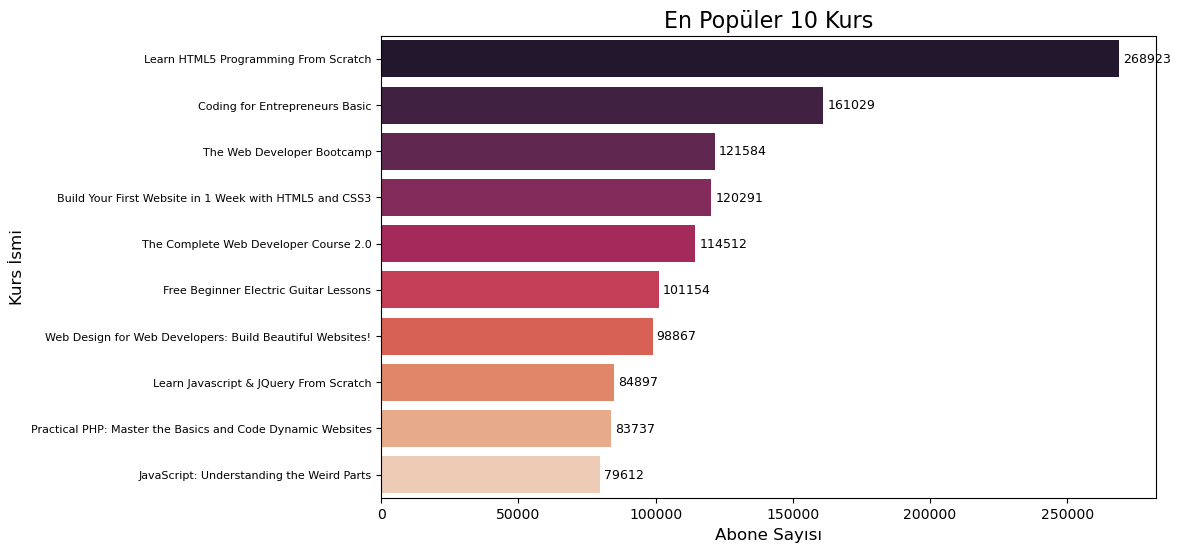

In [168]:
top10_courses = df.sort_values(by='num_subscribers', ascending=False)[:10]

plt.figure(figsize=(10,6))
ax4 = sns.barplot(x='num_subscribers', y='title', data=top10_courses, palette='rocket')

for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=3)

plt.title('En Popüler 10 Kurs', fontsize=16)
plt.xlabel('Abone Sayısı', fontsize=12)
plt.ylabel('Kurs İsmi', fontsize=12)
plt.yticks(fontsize= 8)

plt.show()

Bu çubuk grafiği, en popüler 10 Udemy kursunu abone sayılarına göre göstermektedir.

 - **Learn HTML5 Programming From Scratch** kursu, 250.000'den fazla aboneyle en popüler kurstur. Bu, temel web geliştirme becerilerine olan talebi göstermektedir.
 - Diğer popüler konular arasında **girişimcilik, web geliştirme ve HTML/CSS** yer almakta; bu da teknik ve iş becerilerine olan güçlü ilgiyi vurgulamaktadır.
 - Teknik kurslar ağırlıklı olsa da, Beginner Electric Guitar Lessons gibi teknik olmayan bir kursun da yüksek sırada olması, kullanıcıların çeşitli ilgi alanlarına sahip olduğunu gösteriyor.

## <font color='#C17CFA'> <b>Ders Sayısı ile İnceleme/Yorum Sayısı Arasındaki İlişki</b><font color='black'> 

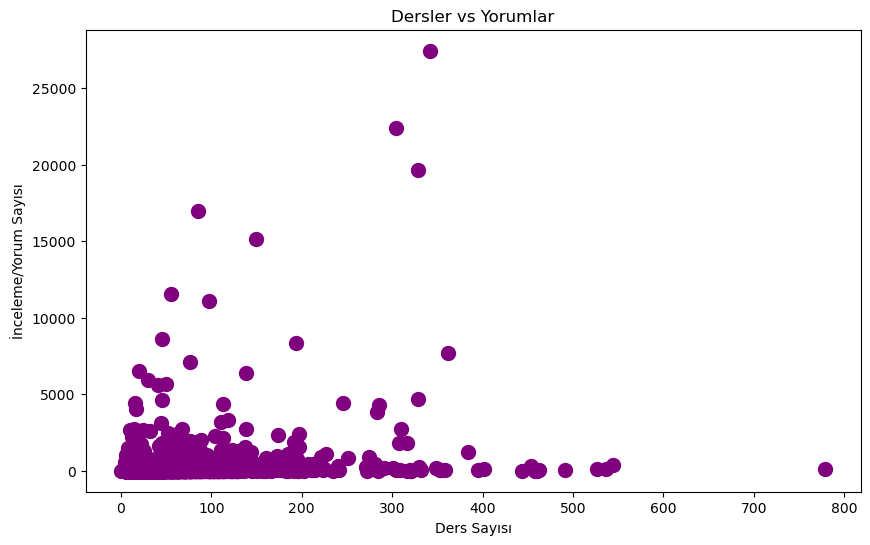

In [176]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_lectures'], df['num_reviews'], color='purple', s=100)

plt.xlabel('Ders Sayısı')
plt.ylabel('İnceleme/Yorum Sayısı')
plt.title('Dersler vs Yorumlar')

plt.show()

Grafikte görüldüğü üzere, daha az sayıda ders içeren kurslar, daha fazla inceleme/yorum almaktadır. Özellikle 0 ile 100 ders arasında yer alan kurslar en fazla inceleme sayısına sahiptir. Ancak, ders sayısı arttıkça inceleme sayısının belirgin bir şekilde artmadığı da görülmektedir. 300'den fazla ders içeren kurslarda ise inceleme sayısı oldukça düşük kalmaktadır. Bu da, ders sayısının fazla olmasının **doğrudan** daha fazla incelemeye yol açmadığını göstermektedir.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Ücretli/Ücretsiz Kurs Analizi</b><font color='black'> 

In [180]:
paid_vs_free = df.paid.value_counts()
paid_vs_free.index = ["Paid", "Free"]
paid_vs_free

Paid    3362
Free     310
Name: count, dtype: int64

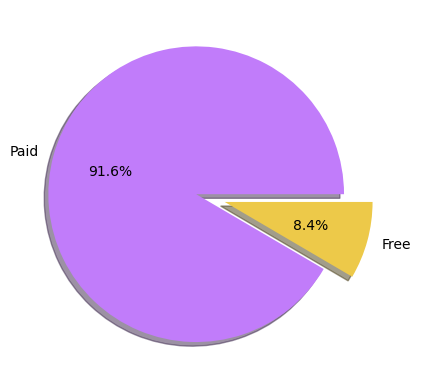

In [182]:
plt.pie(x= paid_vs_free.values,
        labels= paid_vs_free.index,
        autopct= "%1.1f%%",
        explode= [0, 0.2],
        colors= ["#C17CFA", "#EDC949"],
        shadow= True
       )

plt.show()

Pasta grafiğinde görüldüğü üzere, Udemy'deki kursların %91.6'sı ücretli kurslardır. Yalnızca %8.4'ü ücretsiz olarak sunulmaktadır. Bu, platformun büyük çoğunlukla ücretli kurslar üzerine yoğunlaştığını ve ücretsiz kursların oldukça sınırlı olduğunu göstermektedir.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Korelasyon Analizi</b><font color='black'> 

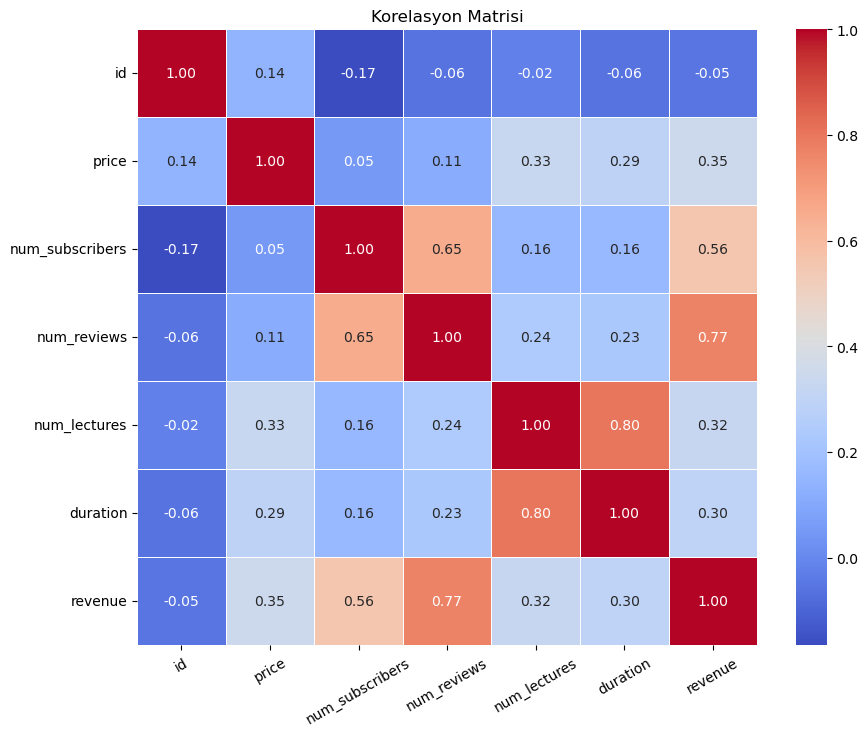

In [186]:
correlation_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.7, fmt=".2f")

plt.title('Korelasyon Matrisi')
plt.xticks(rotation= 30)

plt.show()

Bu ısı haritası değişkenler arasındaki korelasyonları göstermektedir. Rengin yoğunluğu ilişkinin gücünü göstermektedir.

**Gelir (Revenue):**
 - İnceleme sayısı (num_reviews) ile 0.77 güçlü pozitif bir korelasyona sahiptir. Bu, daha fazla incelemeye sahip kursların genelde daha yüksek gelir getirdiğini göstermektedir.
 - Abone sayısı (num_subscribers) ile 0.56 pozitif bir ilişki vardır. Abone sayısı da gelir üzerinde önemli bir etkiye sahiptir.

**İnceleme ve Aboneler (num_reviews ve num_subscribers):**
 - Bu iki değişken arasında 0.65'lik güçlü bir korelasyon görülmektedir. Bu da, daha fazla aboneye sahip kursların daha fazla inceleme aldığını göstermektedir.

*Bu grafik, kurslardaki inceleme ve abone sayısının gelire en büyük katkıyı sağladığını göstermektedir.*

<a id='conclusion'></a>
# <font color='#A435F0'> <b>Sonuç</b><font color='black'> 

**Önemli Bilgiler:**
 - Çoğu kurs düşük fiyatlı (50$ altı), ücretsiz kurslar önemli bir paya sahip.
 - Teknik becerilere odaklanan kurslar (programlama, web geliştirme) en popüler.
 - "Tüm Seviyeler" kursları daha uzun içeriklere sahipken, başlangıç kursları daha kısa.
 - En yüksek geliri teknik kurslar sağlıyor.

**Fiyatlandırma, Popülerlik ve Gelir Eğilimleri:**
 - Düşük fiyatlı kurslar geniş kitlelere hitap ediyor, orta fiyat aralığındaki kurslar daha az popüler.
 - Ücretsiz kurslar yüksek abone sayısına sahip, ancak ücretli teknik kurslar gelir kaynağı.
 - Gelirde artış, teknik alanlarda ve düşük fiyatlı kurslarda gözlemleniyor.

**Potansiyel İyileştirmeler:**
 - Fiyatlandırma stratejisi optimize edilerek 10-50$ aralığındaki kurslar artırılmalı.
 - Kısa modüler içerikler ve uzun kapsamlı kurslar dengelenmeli.
 - Ücretsiz kurslardan ücretli kurslara geçiş teşvik edilmeli.
 - Kişiselleştirilmiş kurs önerileri ve niş konuların keşfi artırılmalı.

**Bu proje, Udemy'nin öğrenci çekme ve gelir artırma stratejilerini geliştirmede kullanılmak üzere analizler yapmak için oluşturulmuştur.**

<p style="background-color:#A435F0;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>TEŞEKKÜRLER!</b></p>